In [1]:
import keras
import numpy as np
from tflearn.datasets import cifar10
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import pandas as pd
import datetime

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#

x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1



In [4]:

#
x_train.shape

#


(50000, 32, 32, 3)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

32

In [7]:
model = Sequential()
#Filters = IMG_width/2 * 7
model.add(Conv2D(112, #alterado de 192 pra 112
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#model.add(BatchNormalization())
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
######### RESIZED ###########
model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
######### RESIZED ###########

model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))


          
#Filters = IMG_width/2 * 9
model.add(Conv2D(144, #alterado de 128 para 144
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#model.add(BatchNormalization())
######### RESIZED ###########
model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
######### RESIZED ###########

model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))


          
          
model.add(Flatten())
#IMG_width^ 2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

#camada anterior/2
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

#Num de classes
model.add(Dense(10, activation='softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 112)       8512      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 96)          10848     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 96)          9312      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 144)         345744    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 144)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 96)          13920     
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy', #alterado de logcosh
              optimizer=SGD(lr=0.01, momentum=0.01, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
 #                   callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 48s 954us/step - loss: 2.3015 - acc: 0.1188 - val_loss: 2.2996 - val_acc: 0.1871
Epoch 2/200
50000/50000 [==============================] - 47s 941us/step - loss: 2.2972 - acc: 0.1549 - val_loss: 2.2912 - val_acc: 0.2433
Epoch 3/200
50000/50000 [==============================] - 47s 939us/step - loss: 2.2763 - acc: 0.1862 - val_loss: 2.2314 - val_acc: 0.2120
Epoch 4/200
50000/50000 [==============================] - 47s 937us/step - loss: 2.1396 - acc: 0.2056 - val_loss: 2.0399 - val_acc: 0.2515
Epoch 5/200
50000/50000 [==============================] - 47s 938us/step - loss: 2.0397 - acc: 0.2339 - val_loss: 2.0163 - val_acc: 0.2482
Epoch 6/200
50000/50000 [==============================] - 47s 948us/step - loss: 1.9850 - acc: 0.2595 - val_loss: 2.0785 - val_acc: 0.2325
Epoch 7/200
50000/50000 [==============================] - 47s 941us/step - loss: 1.9186 - acc: 0.2873 - val_l

Epoch 59/200
50000/50000 [==============================] - 48s 951us/step - loss: 0.6381 - acc: 0.7744 - val_loss: 1.1218 - val_acc: 0.6326
Epoch 60/200
50000/50000 [==============================] - 47s 948us/step - loss: 0.6246 - acc: 0.7789 - val_loss: 1.2107 - val_acc: 0.6350
Epoch 61/200
50000/50000 [==============================] - 68s 1ms/step - loss: 0.6173 - acc: 0.7821 - val_loss: 1.3647 - val_acc: 0.6006
Epoch 62/200
50000/50000 [==============================] - 72s 1ms/step - loss: 0.6008 - acc: 0.7868 - val_loss: 1.1132 - val_acc: 0.6608
Epoch 63/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.5919 - acc: 0.7911 - val_loss: 1.1795 - val_acc: 0.6344
Epoch 64/200
50000/50000 [==============================] - 72s 1ms/step - loss: 0.5766 - acc: 0.7942 - val_loss: 1.2495 - val_acc: 0.6276
Epoch 65/200
50000/50000 [==============================] - 72s 1ms/step - loss: 0.5639 - acc: 0.8023 - val_loss: 1.2269 - val_acc: 0.6429
Epoch 66/200
50000/5000

Epoch 118/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.1535 - acc: 0.9477 - val_loss: 1.9742 - val_acc: 0.6608
Epoch 119/200
50000/50000 [==============================] - 72s 1ms/step - loss: 0.1378 - acc: 0.9525 - val_loss: 2.3118 - val_acc: 0.6405
Epoch 120/200
50000/50000 [==============================] - 72s 1ms/step - loss: 0.1356 - acc: 0.9516 - val_loss: 2.0846 - val_acc: 0.6689
Epoch 121/200
50000/50000 [==============================] - 72s 1ms/step - loss: 0.1346 - acc: 0.9533 - val_loss: 2.2892 - val_acc: 0.6394
Epoch 122/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.1266 - acc: 0.9559 - val_loss: 2.1914 - val_acc: 0.6644
Epoch 123/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.1313 - acc: 0.9561 - val_loss: 2.1171 - val_acc: 0.6685
Epoch 124/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.1202 - acc: 0.9592 - val_loss: 2.1832 - val_acc: 0.6608
Epoch 125/200
50000/

50000/50000 [==============================] - 73s 1ms/step - loss: 0.0422 - acc: 0.9868 - val_loss: 2.6551 - val_acc: 0.6713
Epoch 177/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.0413 - acc: 0.9865 - val_loss: 2.7943 - val_acc: 0.6713
Epoch 178/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.0403 - acc: 0.9873 - val_loss: 2.8090 - val_acc: 0.6611
Epoch 179/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.0420 - acc: 0.9863 - val_loss: 2.7202 - val_acc: 0.6686
Epoch 180/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.0356 - acc: 0.9887 - val_loss: 2.7227 - val_acc: 0.6708
Epoch 181/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.0354 - acc: 0.9886 - val_loss: 3.0255 - val_acc: 0.6588
Epoch 182/200
50000/50000 [==============================] - 73s 1ms/step - loss: 0.0362 - acc: 0.9884 - val_loss: 2.7155 - val_acc: 0.6748
Epoch 183/200
50000/50000 [=======

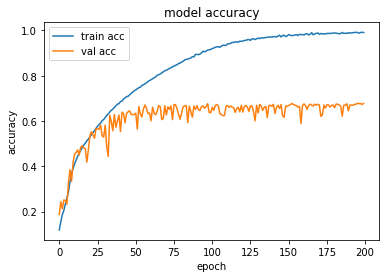

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

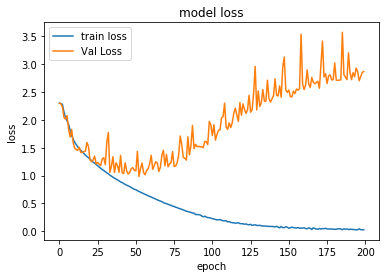

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.87001429291
Test accuracy: 0.6776


In [14]:
print(history.history)

{'val_loss': [2.2996469623565674, 2.2912249454498292, 2.2314242206573485, 2.0399414516448973, 2.016261032676697, 2.0785176033020019, 1.8315272281646728, 1.6973660129547119, 1.830951362991333, 1.5896432481765748, 1.4941456272125244, 1.4687001096725465, 1.4530319452285767, 1.5092433265686036, 1.4159625129699707, 1.4157623462677003, 1.4303081573486327, 1.4402193393707274, 1.5952644180297852, 1.5207477964401246, 1.2833475711822511, 1.2513887861251831, 1.2796839797973634, 1.3505795810699464, 1.2098328277587891, 1.2377937091827393, 1.2059199510574341, 1.1782589836120605, 1.3032087076187133, 1.3213798858642578, 1.197942629814148, 1.6015679786682129, 1.7738016792297364, 1.0608310260772704, 1.1676232949256897, 1.3391043801307678, 1.0549155570030213, 1.2278006832122803, 1.1797622367858887, 1.0603865452766419, 1.3618290782928466, 1.0525099357604981, 1.037187613105774, 1.2299982664108275, 1.0801486729621887, 1.0272405399322511, 1.0648076784133911, 1.125714271068573, 1.1429735076904297, 1.095118919

In [15]:

data = pd.DataFrame(history.history)
nome = 'DoubleConvCifar10NormSameFiltersOnNorm_t3' + str(datetime.datetime.now())+'.json'
data = data.to_json()
with open(nome, "w+") as output_file:
    output_file.write(data)